In [46]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import os
from PIL import Image

In [47]:
def get_images_data(path):
    
    images_data = np.array([])
    names = sorted([name for name in os.listdir(path)])
    for name in names:
        image = Image.open('{}{}'.format(path,name)) # path
        datas = (np.asarray(image)==0).astype('float64')
        for data in datas:
            for d in data:
                images_data = np.append(images_data,d[0])  
    images_data = images_data.reshape(len(names),16*16)
    
    return images_data

path = "../content/drive/MyDrive/data1/"
train, test = get_images_data(path), get_images_data(path)

print(train.shape,test.shape,test.dtype,train.dtype)
train= train.reshape(train.shape[0],1,256)
test = test.reshape(test.shape[0],1,256)


(36, 256) (36, 256) float64 float64


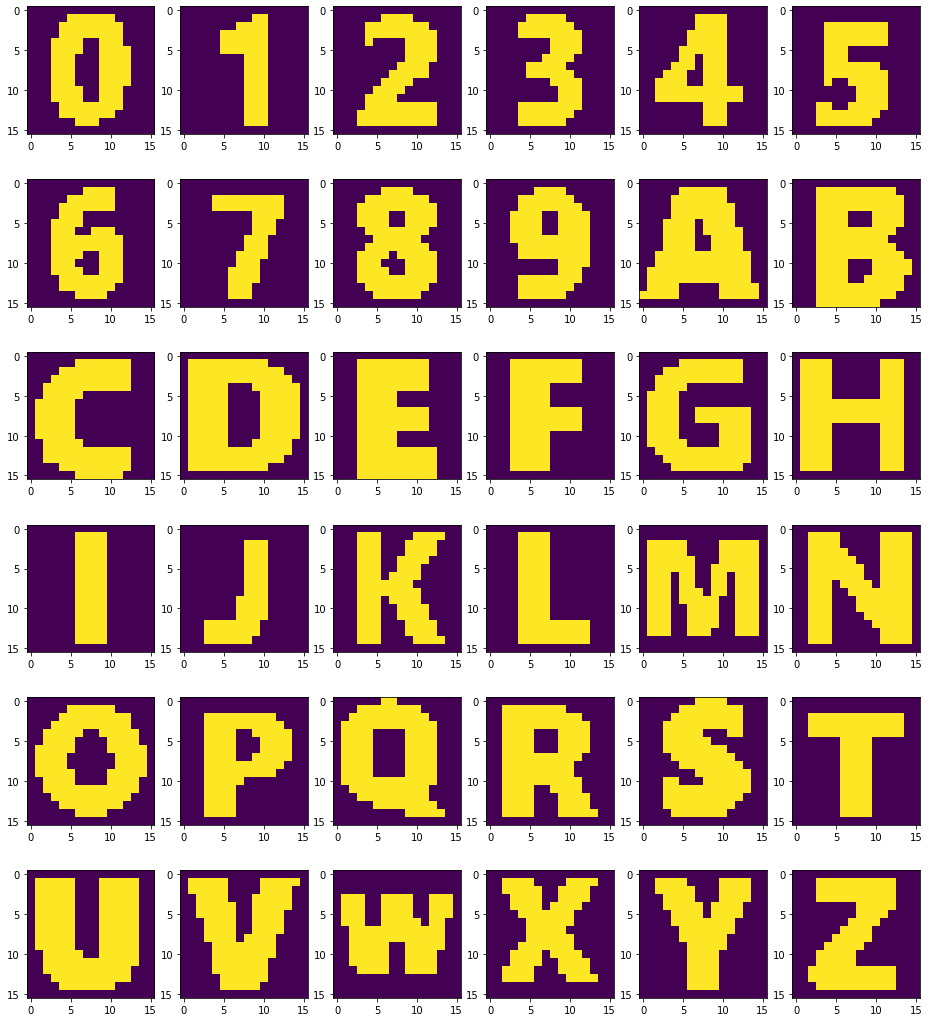

In [48]:
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)

for i,ax in enumerate(axes.flat):
    ax.imshow(train[i].reshape(16,16))

In [49]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense((256), input_shape=(1,256), activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(256, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1, 256)            65792     
                                                                 
 dense_18 (Dense)            (None, 1, 1024)           263168    
                                                                 
 dense_19 (Dense)            (None, 1, 2048)           2099200   
                                                                 
 dense_20 (Dense)            (None, 1, 256)            524544    
                                                                 
Total params: 2,952,704
Trainable params: 2,952,704
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(train, train, epochs=500,validation_data = (test,test))


Epoch 1/500
2/2 [==============================] - 1s 291ms/step - loss: 0.6916 - val_loss: 0.5367
Epoch 2/500
2/2 [==============================] - 0s 64ms/step - loss: 0.5303 - val_loss: 0.4960
Epoch 3/500
2/2 [==============================] - 0s 68ms/step - loss: 0.4955 - val_loss: 0.4495
Epoch 4/500
2/2 [==============================] - 0s 72ms/step - loss: 0.4451 - val_loss: 0.4163
Epoch 5/500
2/2 [==============================] - 0s 66ms/step - loss: 0.4151 - val_loss: 0.4089
Epoch 6/500
2/2 [==============================] - 0s 71ms/step - loss: 0.4079 - val_loss: 0.3787
Epoch 7/500
2/2 [==============================] - 0s 67ms/step - loss: 0.3765 - val_loss: 0.3398
Epoch 8/500
2/2 [==============================] - 0s 66ms/step - loss: 0.3392 - val_loss: 0.3090
Epoch 9/500
2/2 [==============================] - 0s 67ms/step - loss: 0.3074 - val_loss: 0.2829
Epoch 10/500
2/2 [==============================] - 0s 88ms/step - loss: 0.2828 - val_loss: 0.2690
Epoch 11/500
2/2 [

(36, 1, 256) (36, 1, 256)


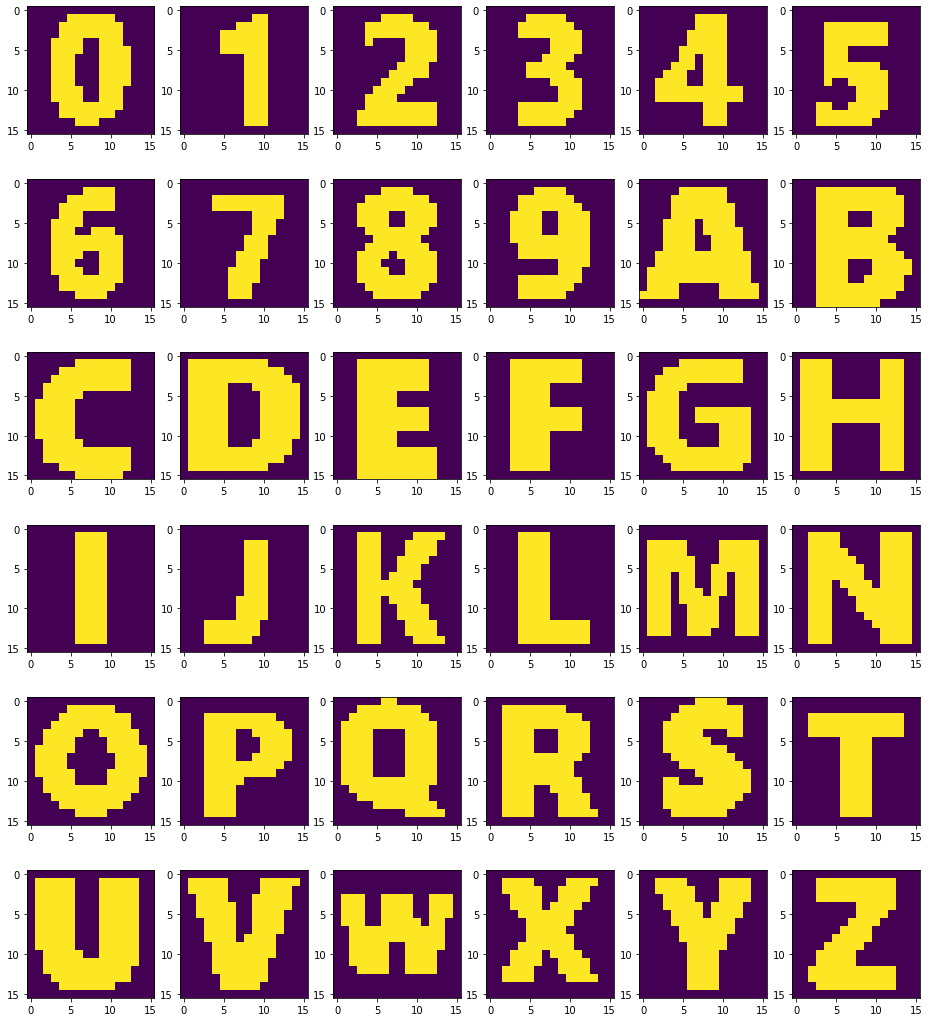

In [51]:
predicted=model.predict(test)
print(test.shape,predicted.shape)

# y = plt.figure()
# y.add_subplot(1,2, 1)
# plt.imshow(test[17].reshape(16,16),cmap="gray")
# plt.title('Actual Image')
# y.add_subplot(1,2, 2)
# plt.imshow(predicted[17].reshape(16,16),cmap="gray")
# plt.title('Predicted Image')


fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)
for i,ax in enumerate(axes.flat):
    ax.imshow(predicted[i].reshape(16,16))

In [52]:
new_path="../content/drive/MyDrive/data2/"
test2 = get_images_data(new_path)
test2 = test2.reshape(test2.shape[0],1,256)

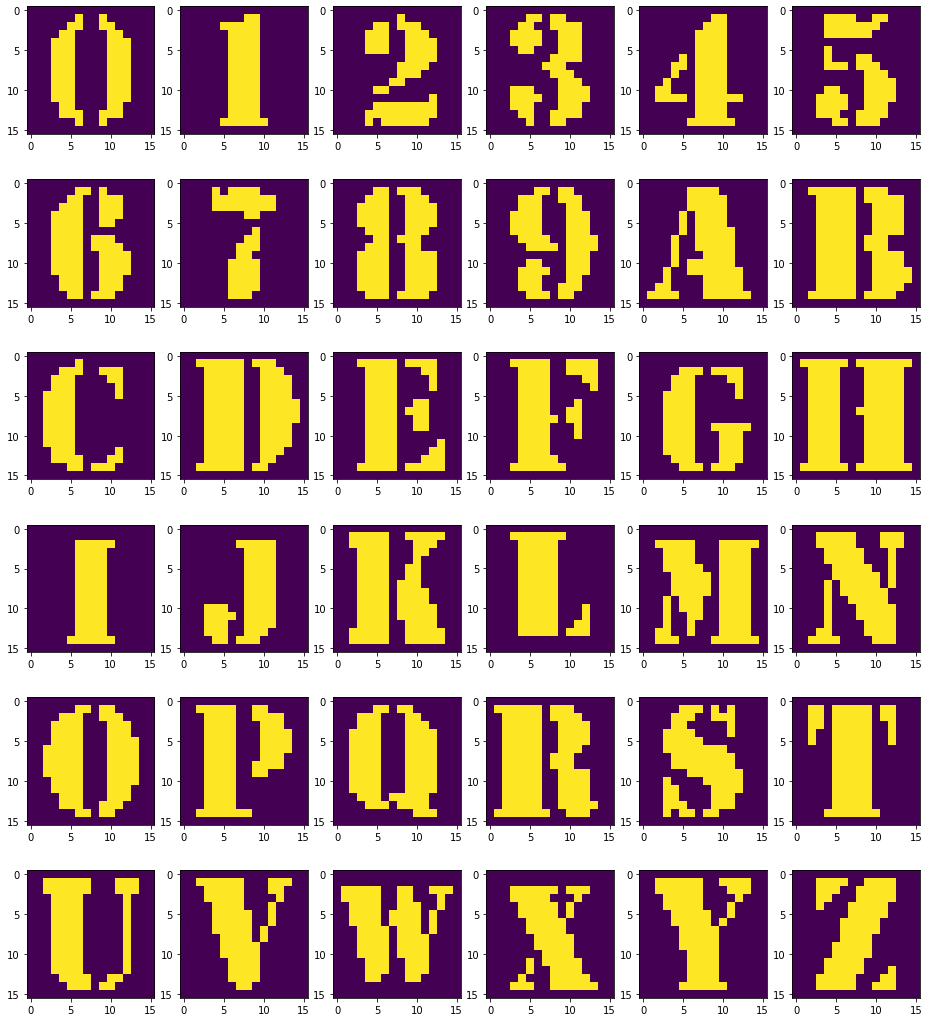

In [53]:
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)

for i,ax in enumerate(axes.flat):
    ax.imshow(test2[i].reshape(16,16))

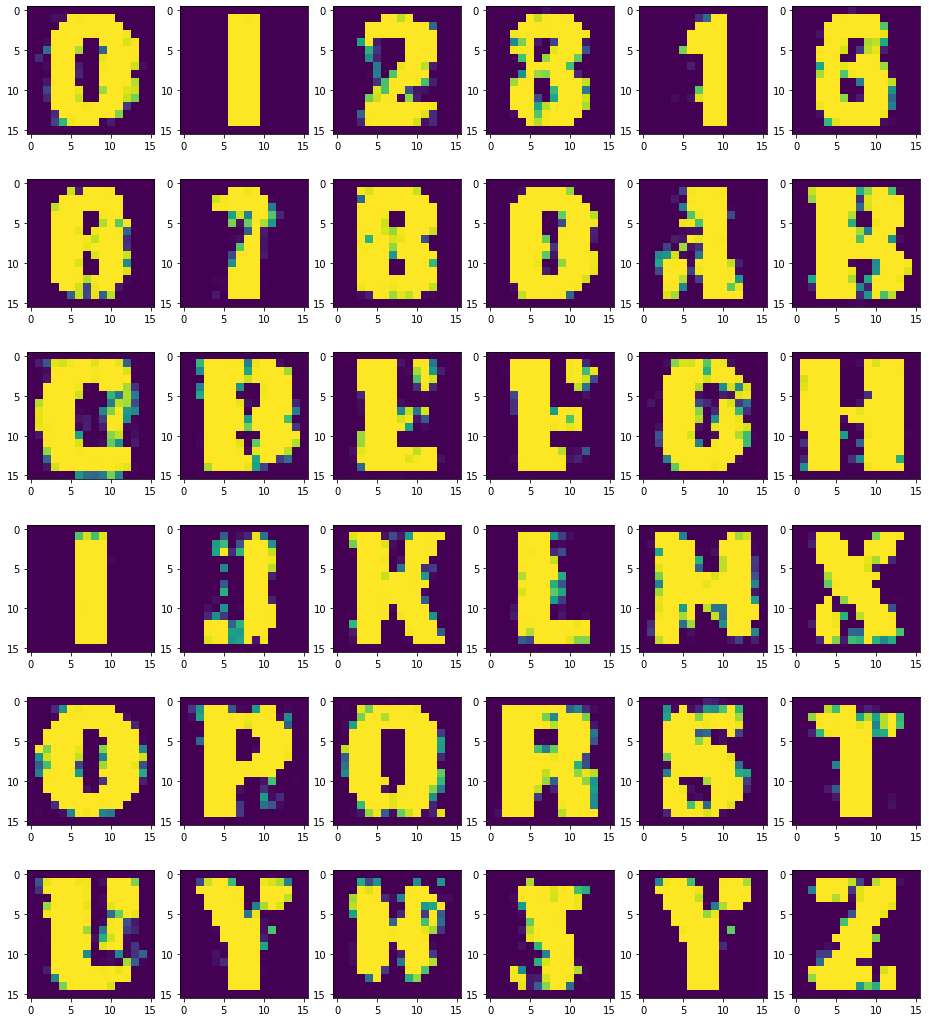

In [54]:
predicted_new=model.predict(test2)
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)
for i,ax in enumerate(axes.flat):
    ax.imshow(predicted_new[i].reshape(16,16))